# Introduction to Deep Learning, HW 1 Template
This document gives a suggested outline for the coding assignment.  Please see the assignment pdf for a more complete description of the assignment.

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Aaron Williams

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import trange         
% matplotlib inline

C:\Users\Zenaardvark\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Problem 2: Algorithmic Implementation of a Multi-Class Logistic Regression without Tensorflow (30 Points)

Succintly, for this problem we have an input image that we have vectorized to have $p=784$ features, and the output space is $C=10$ dimensional.  To get the full details on logistic regression, please visit the example codes and and the lectures.  Succinctly, the multiclass logistic regression model is as follows:

$$\mathbf{\gamma}=\mathbf{W}\mathbf{x}+\mathbf{b},\quad \mathbf{W}\in\mathbb{R}^{C\times p},\quad \mathbf{b}\in\mathbb{R}^{C}$$
$$ p(y=j)=\text{softmax}(\mathbf{\gamma})_j$$
$$\ell(y,\gamma)=\sum_{j=1}^C1_{(y=j)}\log(\text{softmax}(\mathbf{\gamma})_j)$$
or, if $\mathbf{r}$ is a one-hot encoding of $y$, then
$$\ell(r,\gamma)=\mathbf{r}\cdot \log(\text{softmax}(\mathbf{\gamma}))$$
We want to implement this model in more basic codes and learn it to build a better understanding of what's going on before moving to using deep learning toolkits.

In is permissable in the context of this problem to use the MNIST dataset and minibatcher from Tensorflow, which should reduce the amount of bespoke coding that you have to do.

Note that this function is depreciated, but it will work for now.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Visualizing the data to make sure that its understood:

In [ ]:
# Dataset statistics# Datas 
print('Training image data: ', mnist.train.images.shape)
print('Testing image data: ', mnist.test.images.shape)
print('28 x 28 = ', 28*28)

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

You can pull a new data example from MNIST by the following:

Note that the digit will change each time you run this because it is randomly sampling.


Train image 1 is labelled one-hot as [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


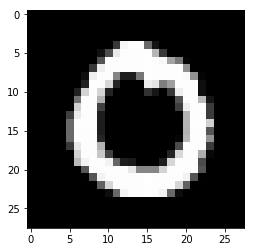

In [4]:
current_data=mnist.train.next_batch(1)
# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(current_data[1]))
image = np.reshape(current_data[0],[28,28])
plt.imshow(image, cmap='gray')

Below are the functions that you need to define to make this work.

In [5]:
def lr_gradient(W,b,data):
    # calculate the gradient on the data
    
    grad = np.zeros((10,785))
    
    W_grad = np.zeros((10,784))
    b_grad = np.zeros((10,1))
    
    batch_size = (data[0].shape)[0]
    for i in range(0,batch_size):
        z = b + np.dot(W,data[0][i]).reshape((10,1))
        #print("current data is " + str(np.dot(W,data[0][i]).shape) + "and b is " + str(b.shape))
        #print("z is " + str(z))
        exp_sum = sum(np.exp(z))
        #print("exp sum is" + str(exp_sum))
        dydz = ((exp_sum - np.exp(z)) * np.exp(z))/(exp_sum**2)
        #print("dydz is" + str(dydz))
        dfdy = 2*(np.exp(z)/exp_sum - data[1][i].reshape((10,1)))
        #print("dfdy is" + str(dfdy))
        final_x = np.concatenate(([1],data[0][i])).reshape((1,785))
        #print("final x is " + str(final_x.shape))
        grad += (final_x * dydz * dfdy)/batch_size
        #print("grad is " + str(grad))
    
    b_grad = grad[:,0].reshape((10,1))
    W_grad = grad[:,1:]
        
    return W_grad, b_grad

In [6]:
def lr_loss(W,b,data):
    # calculate the loss
    avg_loss = 0
        
    batch_size = (data[0].shape)[0]
    for i in range(0,batch_size):
        z = b + np.dot(W,data[0][i]).reshape((10,1))
        softmax = np.exp(z)/sum(np.exp(z))
        #print("soft max is " + str(softmax))
        avg_loss -= np.log(softmax[np.argmax(data[1][i])])/batch_size
    
    #print("avg loss is " + str(avg_loss))
    return avg_loss

Run the stochastic gradient descent optimization loop.  Note that you need to fill in the values to make this work well.

In [7]:
max_iterations = 10000 # choose the max number of iterations
step_size = .05 # choose your step size
W = np.zeros((10,784)) # choose your starting parameters (connection weights)
b = np.zeros((10,1)) # choose your starting parameters (biases)
training_loss_history=[]

#print(mnist.train.images.shape)

for iter in trange(0,max_iterations):
    current_data = mnist.train.next_batch(100)
    # note you need to change this to your preferred data format.
    W_grad,b_grad=lr_gradient(W,b,current_data)
    training_loss_history.append(\
        lr_loss(W,b,current_data))
    W=W-step_size*W_grad
    b=b-step_size*b_grad
    

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:43<00:00, 96.32it/s]


It can be a helpful diagnostic tool to visualize the learning curve:

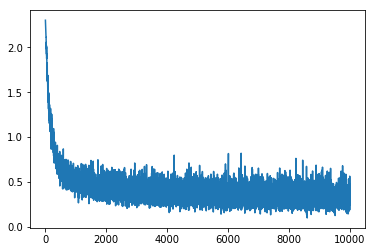

In [8]:
plt.plot(training_loss_history)

Calculate both your training loss and accuracy and your validation loss and accuracy

In [9]:
def get_accuracy(W,b,data):
    
    size = (data[0].shape)[0]

    accuracy = 0
    for i in range(0,size):
        z = b + np.dot(W,data[0][i]).reshape((10,1))
        softmax = np.argmax(np.exp(z)/sum(np.exp(z)))
        #print("soft max is " + str(softmax))
        if softmax == np.argmax(data[1][i]):
            accuracy += 1/size
    
    return accuracy

In [10]:
# Fill in code here.
train_size = mnist.train.images.shape[0]
training_data = mnist.train.next_batch(train_size)
print("training loss is: " + str(lr_loss(W,b,training_data)))
print("training accuracy is: " + str(get_accuracy(W,b,training_data)))

test_size = mnist.test.images.shape[0]
test_data = mnist.train.next_batch(test_size)
print("test loss is: " + str(lr_loss(W,b,test_data)))
print("test accuracy is: " + str(get_accuracy(W,b,test_data)))

training loss is: [0.3384761]
training accuracy is: 0.9125272727267566
test loss is: [0.32414146]
test accuracy is: 0.9153999999999155


## Problem 3: Algorithmic Implementation of a Multi-Class Logistic Regression with Tensorflow (30 Points)
As above, but now you are allowed to use tensorflow to perform model learning.

### (a)	Set up a logistic regression network, and learn it on MNIST using stochastic gradient descent.

In [11]:
# Modeling Definition

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.matmul(x, W) + b

# Softmax to probabilities
py = tf.nn.softmax(y)

# Define labels placeholder
y_ = tf.placeholder(tf.float32, [None, 10])
# Loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
# Learning

# Train the model
for i in trange(10000): 
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys})


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 949.50it/s]


In [13]:
# Evaluation

# Test trained model
correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

# Close session to finish
sess.close()

Test accuracy: 0.9253000020980835


### (b)	Set up an MLP with a single hidden layer (you can choose the number of hidden nodes) and learn it on MNIST using stochastic gradient descent.

In [ ]:
# Modeling Definition

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# hidden layer
W_1 = tf.Variable(tf.random_normal([784, 150]))
b_1 = tf.Variable(tf.random_normal([150]))
z = tf.matmul(x, W_1) + b_1
# Output
W_2 = tf.Variable(tf.random_normal([150, 10]))
b_2 = tf.Variable(tf.random_normal([10]))
y = tf.matmul(tf.nn.sigmoid(z), W_2) + b_2

# Softmax to probabilities
py = tf.nn.softmax(y)

# Define labels placeholder
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(.5).minimize(cross_entropy)

# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# Learning

# Train the model
for i in trange(10000): 
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 


In [ ]:
# Evaluation

# Test trained model
correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

# Close session to finish
sess.close()

### (c)	Set up an MLP with two hidden layers (i.e. lecture 2, slide 55)

In [17]:
# Modeling Definition

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# hidden layer 1
W_1 = tf.Variable(tf.random_normal([784, 200]))
b_1 = tf.Variable(tf.random_normal([200]))
z_1 = tf.matmul(x, W_1) + b_1
# hidden layer 2
W_2 = tf.Variable(tf.random_normal([200, 50]))
b_2 = tf.Variable(tf.random_normal([50]))
z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
# Output
W_3 = tf.Variable(tf.random_normal([50, 10]))
b_3 = tf.Variable(tf.random_normal([10]))
y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

# Softmax to probabilities
py = tf.nn.softmax(y)

# Define labels placeholder
y_ = tf.placeholder(tf.float32, [None, 10])
# Loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
# Learning

for i in trange(10000): 
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})   

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:26<00:00, 374.89it/s]


In [19]:
# Evaluation

# Test trained model
correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

# Close session to finish
sess.close()

Test accuracy: 0.9388999938964844


## Problem 4: Performance Comparison (20 points)

### (a)	Did your implementations and Tensorflow’s implementations from problems 2 and 3 perform the same?

They performed about the same with tensorflow's version performing slightly better and at a faster rate.  My validation accuracy for problem 2 was generally ~0.910 and took 1 minute 50 seconds to train.  The tensorflow version only took 10 seconds and achieved an accuracy around ~0.92. Both tests were run with 100 as the batch size and over 10000 cycles with a 

### (b)	What is the validation accuracy from the multi-class logistic regression?

For multi-class logistic regression my validation accuracy is generally between 0.92 and 0.925.  This test was run with 100 as the batch size and over 10000 cycles with a gradient optimizer of 0.5.

### (c)	What is the validation accuracy from the multi-class MLP with a single hidden layer?  If you change the number of nodes in the hidden layer, how susceptible is the hold out performance?

My results for accuracy and time of test given a specific layer size:

500: 0.945 accuracy, 50 seconds

200: 0.946 accuracy, 23 seconds

100: 0.941 accuracy, 16 seconds

50: 0.939 accuracy, 15 seconds

20: 0.925 accuracy, 11 seconds

10: 0.906 accuracy, 9 seconds

All tests were run with 100 as the batch size and over 10000 cycles and a gradient optimizer of 0.5.  As you can see, a higher hidden layer size meens better performance, but it also takes much longer to compute.  Potentially, the optimizer value, number of cycles, and batch size could have been used to improve performance.  Additionally, I did not account for oerfitting which also might be a factor.

### (d)	What is the validation accuracy from the multi-class MLP with two hidden layer?  If you change the number of nodes in the hidden layers, how susceptible is the hold out performance?

My results for accuracy and time of test given a specific layer size:

500,100: 0.931 accuracy, 56 seconds

200,100: 0.942 accuracy, 30 seconds

200,20: 0.931 accuracy, 28 seconds

100,20: 0.932 accuracy, 16 seconds

All tests were run with 100 as the batch size and over 10000 cycles and a gradient optimizer of 0.5.  There is less consistency with regards to improving hidden layer size and improved accuracy of the two layer MLP.  There might be some sweet spot with my particular parameter inputs, but I suspect a higher number of cycles would improve the end accuracy result for this NN.  Additionally, I did not account for oerfitting which also might be a factor.

### (e)	Do you match my reported accuracies (lecture 2, slide 58)?

I easily match the logistic regression accuracy and don't quite match the hidden layer NN.  This might be because more parameter values need to be played with to reach those accuracies, or more computer power commited to the problem.